# Problem 1

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
import pandas as pd
from scipy.fftpack import fft, dct

(100,)
(100, 100)
(100,)
(90, 100)


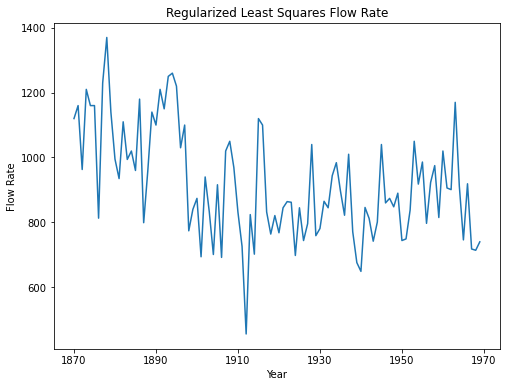

In [189]:
#Loading in the Nile Data
nile = pd.read_csv('nile.csv')
NewNile = nile.drop(labels = range(45, 55), axis = 0)
NileArr = NewNile.to_numpy()
Q = nile.to_numpy()
Time = Q[:, 0]
f_true = Q[:, 1]
f_I = NileArr[:, 1]
print(Time.shape)

#Creating the dct
n = 100
X = scipy.fft.dct(np.eye(n), norm='ortho')
print(X.shape)

#Creating I
I = NewNile.index
print(Time.shape)

X_I = X[I]
alpha = X_I.T@f_I
print(X_I.shape)


plt.figure(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Flow Rate")
plt.plot(f_true)
plt.title("Regularized Least Squares Flow Rate")
plt.xticks([0, 20, 40, 60, 80, 100], labels = [1870, 1890, 1910, 1930, 1950, 1970])
plt.show()

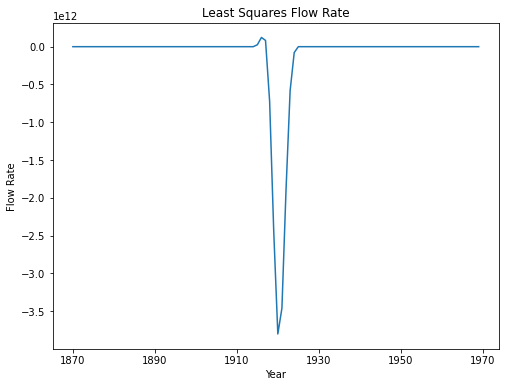

In [151]:
def LS(X, f): #least squares
    alpha = np.linalg.inv(X.T@X)@X.T@f
    return alpha
Alpha1 = LS(X_I, f_I)
f_1 = X@Alpha1
#least squares scatter
plt.figure(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Flow Rate")
plt.plot(f_1)
plt.title("Least Squares Flow Rate")
plt.xticks([0, 20, 40, 60, 80, 100], labels = [1870, 1890, 1910, 1930, 1950, 1970])
plt.show()

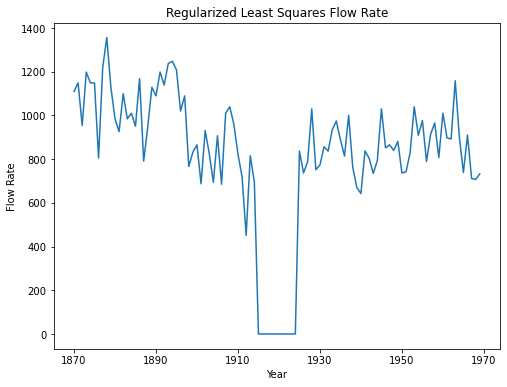

In [185]:
sigma = 0.01
def RegLS(X, sigma, f): #regularized least squares
    alpha = np.linalg.inv(X.T@X + np.identity(100)*sigma)@X.T@f
    return alpha
Alpha2 = RegLS(X_I, sigma, f_I)
f_2 = X@Alpha2
plt.figure(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Flow Rate")
plt.plot(f_2)
plt.title("Regularized Least Squares Flow Rate")
plt.xticks([0, 20, 40, 60, 80, 100], labels = [1870, 1890, 1910, 1930, 1950, 1970])
plt.show()

# Problem 2 

### Part B and C

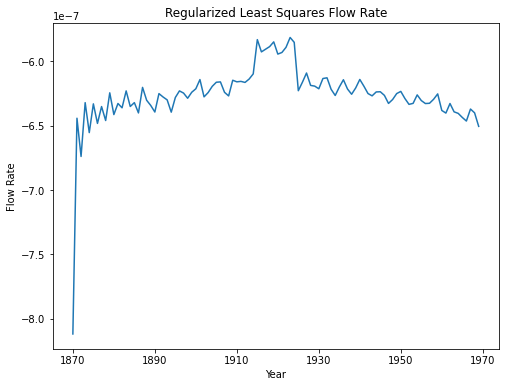

In [233]:
from scipy import optimize
c = np.ones(100)
u_LP = scipy.optimize.linprog(c, A_ub = X_I, b_ub = f_I).x
v_LP = scipy.optimize.linprog(c, A_ub = -X_I, b_ub = f_I).x
AlphaLP = u_LP - v_LP
f_LP = X@AlphaLP


plt.figure(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Flow Rate")
plt.plot(f_LP)
plt.title("Regularized Least Squares Flow Rate")
plt.xticks([0, 20, 40, 60, 80, 100], labels = [1870, 1890, 1910, 1930, 1950, 1970])
plt.show()

(2, 90, 100)


In [223]:
print(X_I.shape)

(90, 100)


Going by my work, it's clear that none of these replicate the missing f values correctly. Likely, the linear program is supposed to be closer to approximating the missing values.

# Problem 4

In [208]:
ONE = np.stack((np.ones(90), -np.ones(90)), axis = 0)
print(ONE)
scipy.optimize.linprog(f_I, X_big, ONE)

(90,)
(90, 100)


array([1.34338096e-14, 2.05395441e-14, 4.46092211e-15, 8.70740186e-15,
       4.31693509e-15, 6.98178916e-15, 5.49206775e-15, 5.47381752e-15,
       3.70289049e-15, 6.78861203e-15, 5.64397945e-15, 7.80914564e-15,
       5.27790345e-15, 7.34563094e-15, 5.41553285e-15, 7.50992758e-15,
       4.95909928e-15, 6.26868008e-15, 6.21819540e-15, 6.21797606e-15,
       5.19864863e-15, 5.80436980e-15, 5.13744408e-15, 5.49115567e-15,
       4.72732367e-15, 5.56030431e-15, 5.98278395e-15, 6.40439875e-15,
       7.24573893e-15, 8.60317957e-15, 7.66084519e-15, 7.60143739e-15,
       7.08291825e-15, 8.72807506e-15, 8.49792513e-15, 8.10123057e-15,
       7.84358858e-15, 6.84395244e-15, 5.99531080e-15, 6.91279866e-15,
       8.60548544e-15, 1.08366986e-14, 3.18867034e-15, 9.45643127e-15,
       1.05270516e-14, 8.38493325e-15, 8.22237757e-15, 8.25380113e-15,
       6.29677217e-15, 8.40076672e-15, 8.12283199e-15, 8.42014908e-15,
       7.45661753e-15, 6.92571112e-15, 6.77359094e-15, 6.92931223e-15,
      